In [ ]:
import pandas as pd

In [ ]:
#combined solar weather xlsx file
file_name = 'Solar_Weather_FInal_Dataset.xlsx'

In [ ]:
#loading xcel file in the pandas dataframe
df = pd.read_excel(file_name)

In [ ]:
#retrieving top5 head rows
df.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,severerisk,conditions,icon,stations,Home Usage (kWh),Net Grid Energy(kWh),Cumulative Solar Production (kWh),Cumulative Home Usage (kWh),Cumulative Net Grid Energy (kWh),Solar Production (kWh)
0,Manteca,2023-08-01T00:00:00,74.5,74.5,47.8,38.80,0.0,0,NaN,0,...,10,Clear,clear-night,"CI070,KSCK,KMOD,KLVK,72492723285,72492623258,7...",0.80,0.80,0.00,0.80,0.80,0.00
1,Manteca,2023-08-01T01:00:00,73.5,73.5,48.8,41.62,0.0,0,NaN,0,...,10,Clear,clear-night,"CI070,KSCK,KMOD,KLVK,72492723285,72492623258,7...",0.55,0.54,0.01,1.35,1.34,0.01
2,Manteca,2023-08-01T02:00:00,71.7,71.7,49.9,46.29,0.0,0,NaN,0,...,10,Clear,clear-night,"CI070,KSCK,KMOD,KLVK,72492723285,72492623258,7...",0.70,0.70,0.01,2.05,2.04,0.00
3,Manteca,2023-08-01T03:00:00,70.6,70.6,51.0,49.91,0.0,0,NaN,0,...,10,Clear,clear-night,"CI070,KSCK,KMOD,KLVK,72492723285,72492623258,7...",0.33,0.32,0.02,2.38,2.36,0.01
4,Manteca,2023-08-01T04:00:00,67.9,67.9,52.7,58.26,0.0,0,NaN,0,...,10,Clear,clear-night,"CI070,KSCK,KMOD,KLVK,72492723285,72492623258,7...",0.48,0.48,0.02,2.86,2.84,0.00


In [ ]:
#adjusting datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
#pulling out week, month and hour from datatime format

df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month

In [ ]:
# Dropping columns that are likely not needed for analysis
columns_to_drop = ['name', 'preciptype', 'icon', 'stations', 'snow', 'snowdepth', 'severerisk']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [ ]:
df.head()

,datetime,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,...,conditions,Home Usage (kWh),Net Grid Energy(kWh),Cumulative Solar Production (kWh),Cumulative Home Usage (kWh),Cumulative Net Grid Energy (kWh),Solar Production (kWh),hour,day_of_week,month
0,2023-08-01 00:00:00,74.5,74.5,47.8,38.80,0.0,0,13.9,7.8,296,...,Clear,0.80,0.80,0.00,0.80,0.80,0.00,0,1,8
1,2023-08-01 01:00:00,73.5,73.5,48.8,41.62,0.0,0,12.8,8.6,296,...,Clear,0.55,0.54,0.01,1.35,1.34,0.01,1,1,8
2,2023-08-01 02:00:00,71.7,71.7,49.9,46.29,0.0,0,10.3,4.8,322,...,Clear,0.70,0.70,0.01,2.05,2.04,0.00,2,1,8
3,2023-08-01 03:00:00,70.6,70.6,51.0,49.91,0.0,0,10.3,6.9,346,...,Clear,0.33,0.32,0.02,2.38,2.36,0.01,3,1,8
4,2023-08-01 04:00:00,67.9,67.9,52.7,58.26,0.0,0,10.3,5.5,311,...,Clear,0.48,0.48,0.02,2.86,2.84,0.00,4,1,8


In [ ]:
len(df)

5856

In [ ]:
# Find unique values in the 'precip' column
unique_precip_values = df['precip'].unique()

# Print the unique values
print("Unique values in the 'precip' column:", unique_precip_values)


Unique values in the 'precip' column: [0.    0.001 0.01  0.002 0.164 0.02  0.003 0.039 0.038 0.022 0.046 0.101
 0.006 0.072 0.042 0.017 0.014 0.061 0.027 0.011 0.14  0.177 0.033 0.005
 0.102 0.055 0.092 0.094 0.004 0.007 0.019 0.031 0.058 0.082 0.045 0.013
 0.024 0.068 0.135 0.053 0.009 0.023 0.069 0.032 0.188 0.19  0.13  0.165
 0.16  0.036 0.03  0.021 0.103 0.142 0.162 0.064 0.028 0.012 0.04  0.048
 0.018 0.054 0.037 0.044 0.041 0.117 0.081 0.008 0.128 0.043 0.035 0.171
 0.059 0.085 0.116 0.362 0.183 0.062 0.051 0.026 0.098 0.029 0.075 0.025
 0.015 0.063 0.067 0.047 0.056 0.034 0.049 0.06  0.09  0.23  0.095 0.052
 0.114 0.016 0.087 0.086 0.161 0.097]


In [ ]:
# Counting null values in each column
null_values = df.isnull().sum()

# Displaying the count of null values per column
print("Count of null values per column:\n", null_values)


Count of null values per column:
 datetime                             0
temp                                 0
feelslike                            0
dew                                  0
humidity                             0
precip                               0
precipprob                           0
windgust                             0
windspeed                            0
winddir                              0
sealevelpressure                     0
cloudcover                           0
visibility                           0
solarradiation                       0
solarenergy                          0
uvindex                              0
conditions                           0
Home Usage (kWh)                     0
Net Grid Energy(kWh)                 0
Cumulative Solar Production (kWh)    0
Cumulative Home Usage (kWh)          0
Cumulative Net Grid Energy (kWh)     0
Solar Production (kWh)               0
hour                                 0
day_of_week                   

In [ ]:
# Counting duplicate rows
duplicate_rows = df.duplicated().sum()

# Displaying the number of duplicate rows
print("Number of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


In [ ]:
# Find the row where 'Solar Production (kWh)' is null
null_solar_production_rows = df[df['Solar Production (kWh)'].isnull()]

# Display the row(s)
print(null_solar_production_rows)

Empty DataFrame
Columns: [datetime, temp, feelslike, dew, humidity, precip, precipprob, windgust, windspeed, winddir, sealevelpressure, cloudcover, visibility, solarradiation, solarenergy, uvindex, conditions, Home Usage (kWh), Net Grid Energy(kWh), Cumulative Solar Production (kWh), Cumulative Home Usage (kWh), Cumulative Net Grid Energy (kWh), Solar Production (kWh), hour, day_of_week, month]
Index: []

[0 rows x 26 columns]


In [ ]:
len(df)

5856

In [ ]:
# Find the row where 'Solar Production (kWh)' is null
null_solar_production_rows = df[df['Solar Production (kWh)'].isnull()]

# Display the row(s)
print(null_solar_production_rows)


Empty DataFrame
Columns: [datetime, temp, feelslike, dew, humidity, precip, precipprob, windgust, windspeed, winddir, sealevelpressure, cloudcover, visibility, solarradiation, solarenergy, uvindex, conditions, Home Usage (kWh), Net Grid Energy(kWh), Cumulative Solar Production (kWh), Cumulative Home Usage (kWh), Cumulative Net Grid Energy (kWh), Solar Production (kWh), hour, day_of_week, month]
Index: []

[0 rows x 26 columns]


In [ ]:

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Now, when you use df.head(), all columns will be displayed
print(df.head())

             datetime  temp  feelslike   dew  humidity  precip  precipprob  \
0 2023-08-01 00:00:00  74.5       74.5  47.8     38.80     0.0           0   
1 2023-08-01 01:00:00  73.5       73.5  48.8     41.62     0.0           0   
2 2023-08-01 02:00:00  71.7       71.7  49.9     46.29     0.0           0   
3 2023-08-01 03:00:00  70.6       70.6  51.0     49.91     0.0           0   
4 2023-08-01 04:00:00  67.9       67.9  52.7     58.26     0.0           0   

   windgust  windspeed  winddir  sealevelpressure  cloudcover  visibility  \
0      13.9        7.8      296            1012.7         0.0         9.9   
1      12.8        8.6      296            1012.4         0.0         9.9   
2      10.3        4.8      322            1012.6         0.0         9.9   
3      10.3        6.9      346            1012.3         0.0         9.8   
4      10.3        5.5      311            1012.4         0.0         9.9   

   solarradiation  solarenergy  uvindex conditions  Home Usage (kWh)

In [ ]:
# Applying one-hot encoding to the 'conditions' categorical column
df_encoded = pd.get_dummies(df, columns=['conditions'])

# Check the new columns created as a result of one-hot encoding
print(df_encoded.columns)


Index(['datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'Home Usage (kWh)', 'Net Grid Energy(kWh)',
       'Cumulative Solar Production (kWh)', 'Cumulative Home Usage (kWh)',
       'Cumulative Net Grid Energy (kWh)', 'Solar Production (kWh)', 'hour',
       'day_of_week', 'month', 'conditions_Clear', 'conditions_Overcast',
       'conditions_Partially cloudy', 'conditions_Rain',
       'conditions_Rain, Overcast', 'conditions_Rain, Partially cloudy'],
      dtype='object')


In [ ]:
# This line shows us a summary like how many entries, the average of each column, and more.
print(df_encoded.describe())


                            datetime         temp    feelslike          dew  \
count                           5856  5856.000000  5856.000000  5856.000000   
mean   2023-11-30 22:59:00.368852480    59.781472    59.211083    47.242640   
min              2023-08-01 00:00:00    30.100000    28.600000    24.600000   
25%              2023-09-30 23:45:00    49.900000    49.100000    42.200000   
50%              2023-11-30 22:30:00    57.700000    57.700000    47.800000   
75%              2024-01-30 22:15:00    67.600000    67.600000    53.000000   
max              2024-03-31 23:00:00   104.500000   107.500000    65.600000   
std                              NaN    13.619027    13.945191     7.647123   

          humidity       precip   precipprob     windgust    windspeed  \
count  5856.000000  5856.000000  5856.000000  5856.000000  5856.000000   
mean     67.714780     0.002068     8.025956    11.792298     6.067094   
min      10.310000     0.000000     0.000000     3.400000     0.00

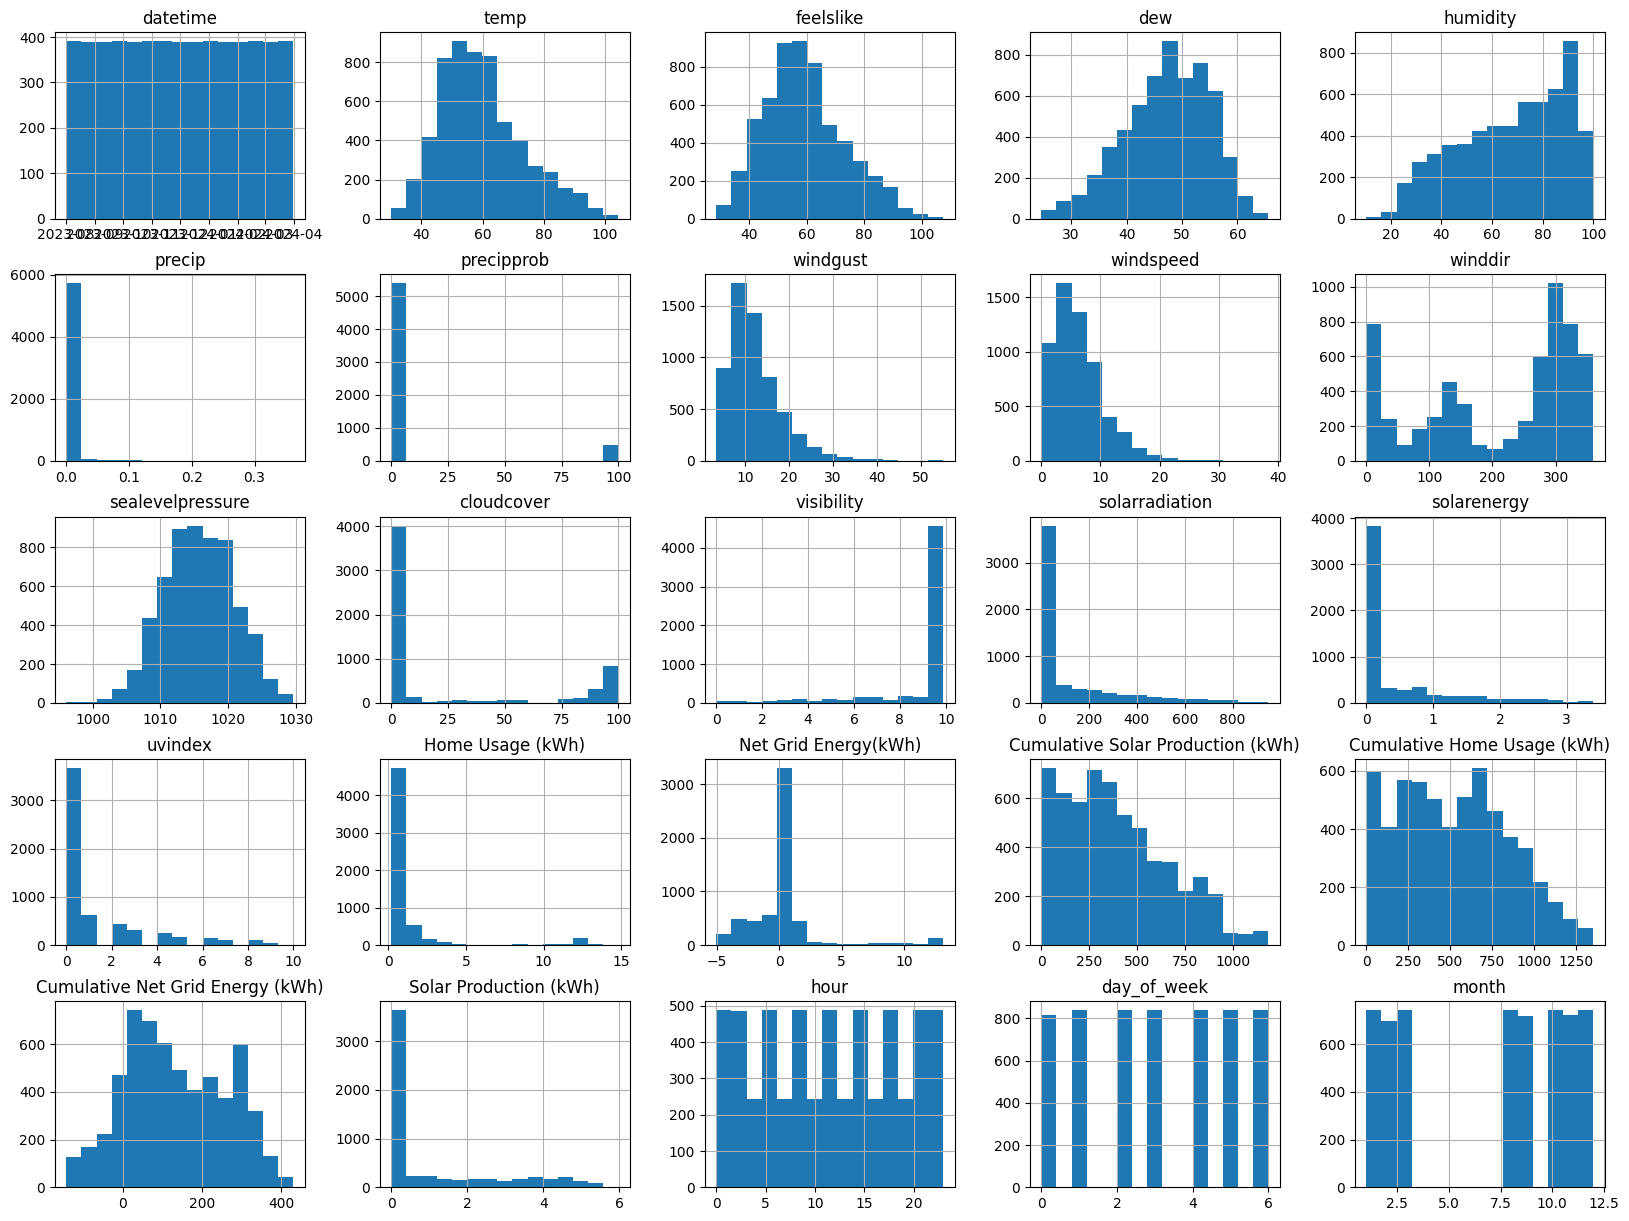

In [ ]:
import matplotlib.pyplot as plt


# Drawing histograms for a general idea of how data is spread.
df_encoded.hist(bins=15, figsize=(20, 15))
plt.show()

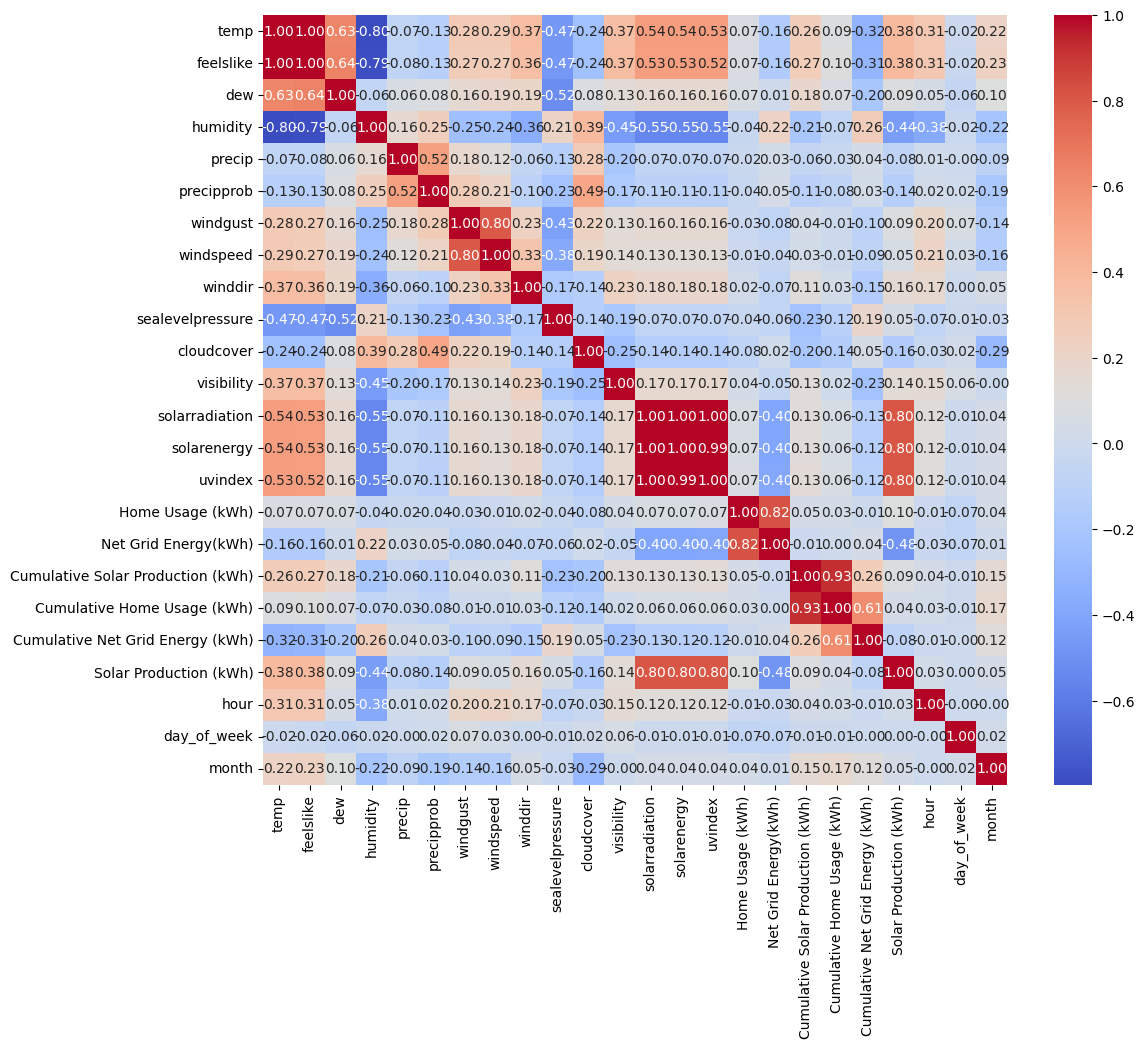

In [ ]:
import numpy as np
import seaborn as sns

# Select only numeric columns from the DataFrame
df_numeric = df_encoded.select_dtypes(include=[np.number])

# Set the figure size for the heatmap for clarity
plt.figure(figsize=(12, 10))

# Generate the heatmap
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

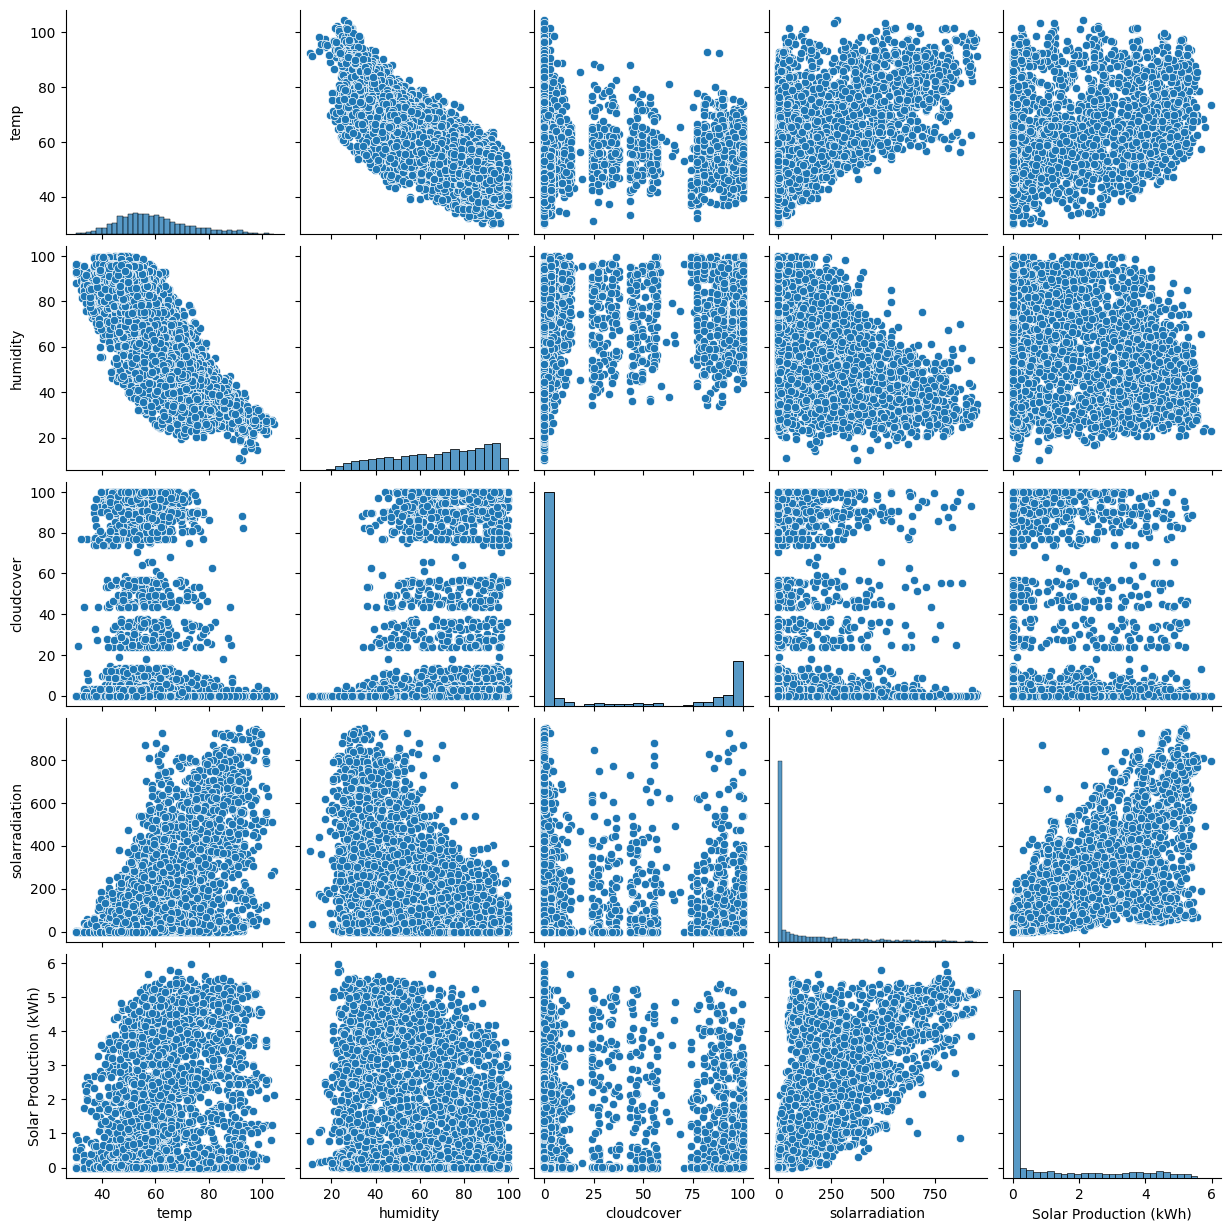

In [ ]:
features_to_plot = ['temp', 'humidity', 'cloudcover', 'solarradiation', 'Solar Production (kWh)']

# Creating the pair plot
sns.pairplot(df_encoded[features_to_plot])
plt.show()

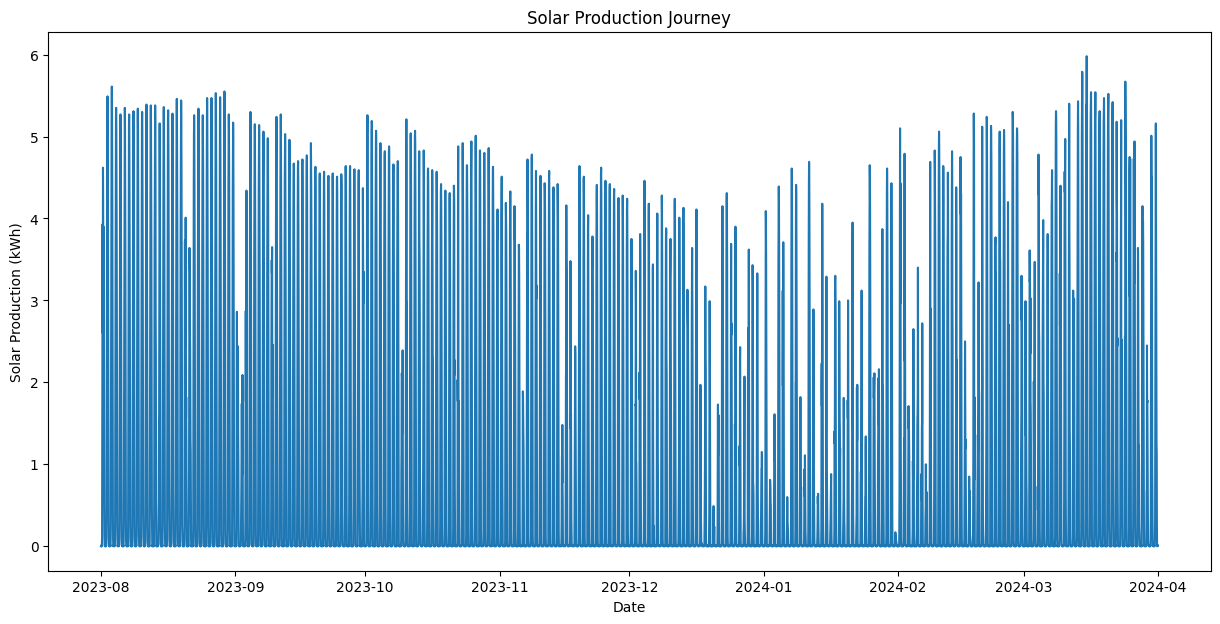

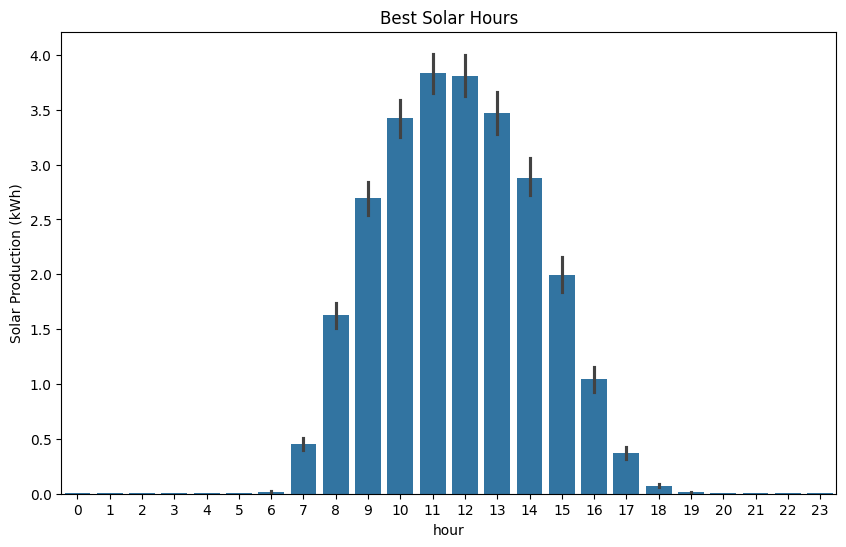

In [ ]:
# Drawing a line over time to see our solar production journey.
plt.figure(figsize=(15, 7))
plt.plot(df_encoded['datetime'], df_encoded['Solar Production (kWh)'])
plt.title('Solar Production Journey')
plt.xlabel('Date')
plt.ylabel('Solar Production (kWh)')
plt.show()

# Also, let's check if there's a best time of day for solar energy.
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='Solar Production (kWh)', data=df)
plt.title('Best Solar Hours')
plt.show()


In [ ]:
# Calculating IQR to find outliers
Q1 = df_encoded['Solar Production (kWh)'].quantile(0.25)
Q3 = df_encoded['Solar Production (kWh)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Highlighting the outliers
outliers = df_encoded[(df_encoded['Solar Production (kWh)'] < lower_bound) | (df_encoded['Solar Production (kWh)'] > upper_bound)]
print("Number of unique outliers found:", outliers.shape[0])


Number of unique outliers found: 247


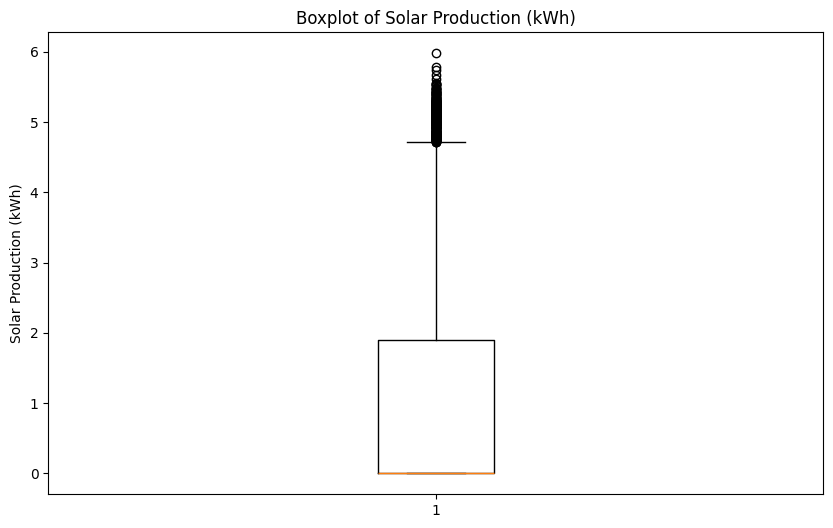

In [ ]:
#Boxplot to visualize the outliers
import matplotlib.pyplot as plt

# Creating a boxplot for Solar Production (kWh)
plt.figure(figsize=(10, 6))  # Setting the figure size for better visibility
plt.boxplot(df_encoded['Solar Production (kWh)'])  # Plotting the boxplot
plt.title('Boxplot of Solar Production (kWh)')  # Adding a title to the plot
plt.ylabel('Solar Production (kWh)')  # Labeling the y-axis

# Displaying the plot
plt.show()



In [ ]:
df_encoded.head()

,datetime,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,Home Usage (kWh),Net Grid Energy(kWh),Cumulative Solar Production (kWh),Cumulative Home Usage (kWh),Cumulative Net Grid Energy (kWh),Solar Production (kWh),hour,day_of_week,month,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,2023-08-01 00:00:00,74.5,74.5,47.8,38.80,0.0,0,13.9,7.8,296,1012.7,0.0,9.9,0,0.0,0,0.80,0.80,0.00,0.80,0.80,0.00,0,1,8,True,False,False,False,False,False
1,2023-08-01 01:00:00,73.5,73.5,48.8,41.62,0.0,0,12.8,8.6,296,1012.4,0.0,9.9,0,0.0,0,0.55,0.54,0.01,1.35,1.34,0.01,1,1,8,True,False,False,False,False,False
2,2023-08-01 02:00:00,71.7,71.7,49.9,46.29,0.0,0,10.3,4.8,322,1012.6,0.0,9.9,0,0.0,0,0.70,0.70,0.01,2.05,2.04,0.00,2,1,8,True,False,False,False,False,False
3,2023-08-01 03:00:00,70.6,70.6,51.0,49.91,0.0,0,10.3,6.9,346,1012.3,0.0,9.8,0,0.0,0,0.33,0.32,0.02,2.38,2.36,0.01,3,1,8,True,False,False,False,False,False
4,2023-08-01 04:00:00,67.9,67.9,52.7,58.26,0.0,0,10.3,5.5,311,1012.4,0.0,9.9,0,0.0,0,0.48,0.48,0.02,2.86,2.84,0.00,4,1,8,True,False,False,False,False,False


In [ ]:
# Selecting specific features based on the discussion to avoid multicollinearity
selected_features = [
    'temp','dew', 'humidity', 'solarradiation','windspeed','cloudcover', 'visibility', 'hour',
    'day_of_week', 'month'
] + [col for col in df_encoded.columns if 'conditions_' in col]

# Your target variable
target_variable = 'Solar Production (kWh)'

# Creating the final DataFrame for features
features_final = df_encoded[selected_features]

# Creating the target series
target_final = df_encoded[target_variable]

# Displaying the first few rows of the features DataFrame to verify
print(features_final.head())
# Displaying the first few rows of the target series to verify
print(target_final.head())


   temp   dew  humidity  solarradiation  windspeed  cloudcover  visibility  \
0  74.5  47.8     38.80               0        7.8         0.0         9.9   
1  73.5  48.8     41.62               0        8.6         0.0         9.9   
2  71.7  49.9     46.29               0        4.8         0.0         9.9   
3  70.6  51.0     49.91               0        6.9         0.0         9.8   
4  67.9  52.7     58.26               0        5.5         0.0         9.9   

   hour  day_of_week  month  conditions_Clear  conditions_Overcast  \
0     0            1      8              True                False   
1     1            1      8              True                False   
2     2            1      8              True                False   
3     3            1      8              True                False   
4     4            1      8              True                False   

   conditions_Partially cloudy  conditions_Rain  conditions_Rain, Overcast  \
0                        False  

In [ ]:
# Concatenate the features and target variable into one DataFrame
final_df = pd.concat([features_final, target_final], axis=1)

# Save the DataFrame to a CSV file
final_df.to_csv("solar_generation_selected_features.csv", index=False)
